<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the  Libraries:

In [338]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn  as sns
import numpy as np

# Load and Perform EDA on the Dataset:

In [339]:
df = pd.read_csv('Churn_Modelling.csv')

In [340]:
df.shape

(10000, 14)

In [341]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [342]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [343]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No null Values so no need to perform any more Actions

In [344]:
df.duplicated().sum()

np.int64(0)

Nice no duplicates

In [345]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


Ok so the ratio of male and female is actually biased

In [346]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [347]:
df.shape

(10000, 11)

AS you can see there were originally 14 features but we removed three so only 11 is remaining

In [348]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Performing one hot encoding for Geography and Genders:

In [349]:
df = pd.get_dummies(df,columns=['Geography','Gender'])

In [350]:
"""from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Geography', 'Gender'])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(df)
encoded_feature_names = ct.get_feature_names_out()

df = pd.DataFrame(X, columns=encoded_feature_names)
"""

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\n\nct = ColumnTransformer(\n    transformers=[\n        ('cat', OneHotEncoder(), ['Geography', 'Gender'])\n    ],\n    remainder='passthrough'\n)\n\nX = ct.fit_transform(df)\nencoded_feature_names = ct.get_feature_names_out()\n\ndf = pd.DataFrame(X, columns=encoded_feature_names)\n"

In [351]:
print(df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1              True   
1            

# Let's use label encoder to remove true and false and get 0 and 1

In [352]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography_Spain'] = le.fit_transform(df['Geography_Spain'])
df['Geography_Germany'] = le.fit_transform(df['Geography_Germany'])
df['Geography_France'] = le.fit_transform(df['Geography_France'])
df['Gender_Male'] = le.fit_transform(df['Gender_Male'])
df['Gender_Female'] = le.fit_transform(df['Gender_Female'])


In [353]:
print(df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1            

# Divide data into training and test sets:

In [354]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [355]:
print(X_train)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7389          667   34       5       0.00              2          1   
9275          427   42       1   75681.52              1          1   
2995          535   29       2  112367.34              1          1   
5316          654   40       5  105683.63              1          1   
356           850   57       8  126776.30              2          1   
...           ...  ...     ...        ...            ...        ...   
9225          594   32       4  120074.97              2          1   
4859          794   22       4  114440.24              1          1   
3264          738   35       5  161274.05              2          1   
9845          590   38       9       0.00              2          1   
2732          623   48       1  108076.33              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
7389               0        163830.64                 0              

As you see some of the weights are too large which will increase bias in our model so we need to scale them to a same size

# Apply Feature Scaling:

In [356]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [357]:
print(X_train)

[[ 0.16958176 -0.46460796  0.00666099 ...  1.74309049  1.09168714
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ... -0.57369368 -0.91601335
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.57369368  1.09168714
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.57369368 -0.91601335
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ...  1.74309049  1.09168714
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ... -0.57369368  1.09168714
  -1.09168714]]


In [358]:
print(X_test)


[[-0.55204276 -0.36890377  1.04473698 ... -0.57369368  1.09168714
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.57369368  1.09168714
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ...  1.74309049  1.09168714
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ...  1.74309049 -0.91601335
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ... -0.57369368 -0.91601335
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ... -0.57369368 -0.91601335
   0.91601335]]


# Using Tensorflow and Keras for Neural Network Programming:

In [359]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [371]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=13))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [372]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Compilation:

In [375]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [380]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8627 - loss: 0.3213 - val_accuracy: 0.8650 - val_loss: 0.3507
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8610 - loss: 0.3295 - val_accuracy: 0.8644 - val_loss: 0.3515
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8686 - loss: 0.3175 - val_accuracy: 0.8644 - val_loss: 0.3514
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8598 - loss: 0.3247 - val_accuracy: 0.8644 - val_loss: 0.3512
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8569 - loss: 0.3307 - val_accuracy: 0.8637 - val_loss: 0.3523
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8596 - loss: 0.3304 - val_accuracy: 0.8637 - val_loss: 0.3512
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8637 - loss: 0.3195 - val_accuracy: 0.8644 - val_loss: 0.3511
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8701 - loss: 0.3127 - val_accu

In [381]:
model.layers[0].get_weights()

[array([[-0.05769915, -0.12407554, -0.05675951, -0.01245079,  0.09802753,
          0.07180727,  0.00955405,  0.27523866],
        [ 0.8843617 ,  0.3831882 , -0.97412556,  0.4287985 , -0.60218674,
          0.1491672 , -0.10071248, -0.7272726 ],
        [ 0.02950258,  0.03102463, -0.16013908,  0.02536404,  0.10413861,
         -0.00533924,  0.1250223 ,  0.3688768 ],
        [-0.02365742, -0.29608062, -0.1348719 , -0.31677735,  0.04816166,
         -0.97195435, -0.87477475, -0.1981975 ],
        [ 0.47311357, -1.1624382 ,  0.19734196,  1.7604039 ,  0.02959966,
         -1.0370277 , -0.21104719,  1.1311265 ],
        [-0.09575272, -0.16593647, -0.43171987, -0.20973575,  0.09522951,
         -0.01884383, -0.12172186, -0.00607864],
        [ 0.41746292, -0.42156488, -0.6713624 , -0.2786166 , -0.10079918,
         -0.15730192,  0.09903625, -0.47376543],
        [-0.10669788,  0.01147931, -0.18741377, -0.19463104,  0.07716113,
         -0.16868688, -0.22055344, -0.13070199],
        [-0.1095

In [382]:
model.layers[1].get_weights()


[array([[-3.684272  , -0.42609683,  1.1870941 ,  0.0432127 ,  0.65963346,
         -0.04619754, -1.0894951 , -1.0622108 ],
        [-1.0523483 , -0.2700244 ,  0.27412206, -0.06132299, -0.32681054,
         -0.08750787,  0.5856101 ,  0.5143409 ],
        [-0.4974968 , -0.3196564 ,  0.38713875,  0.5074401 ,  0.4664076 ,
         -0.4505969 , -0.21529578,  0.18896946],
        [-0.24885051, -0.09420044, -0.33262983, -0.9271738 , -0.09019894,
          0.9373783 ,  0.9663906 , -0.8497047 ],
        [ 0.06519742, -0.45818454,  0.59216744,  0.22707574,  0.3108234 ,
         -0.46790183, -0.6031647 , -0.00526847],
        [-0.94199795,  0.01012113,  0.38577414,  0.33036473, -0.5424912 ,
         -2.2106829 ,  0.2609333 ,  0.42507678],
        [ 0.37088686, -0.11725561, -0.09719487,  0.5004084 ,  1.089704  ,
         -0.36349607, -0.26138023,  0.5427898 ],
        [ 0.37644285,  0.16708714, -0.20210084,  0.51513845, -0.00659945,
          0.37844208, -1.5014772 ,  0.50028735]], dtype=float32),

In [383]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [384]:
y_pred = np.where(y_log>0.5,1,0)   # As we know Sigmoid af output is in probability so to get it in 1,0 we use np.where
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.8575


Quite a good Accuracy Score

In [385]:
history.history

{'accuracy': [0.866406261920929,
  0.8656250238418579,
  0.8648437261581421,
  0.8648437261581421,
  0.8643749952316284,
  0.8656250238418579,
  0.866406261920929,
  0.8659374713897705,
  0.8651562333106995,
  0.8653125166893005,
  0.866406261920929,
  0.8651562333106995,
  0.8657812476158142,
  0.8646875023841858,
  0.8668749928474426,
  0.8659374713897705,
  0.8657812476158142,
  0.8656250238418579,
  0.8643749952316284,
  0.8668749928474426,
  0.8646875023841858,
  0.866406261920929,
  0.866406261920929,
  0.8660937547683716,
  0.8660937547683716,
  0.8642187714576721,
  0.8667187690734863,
  0.8668749928474426,
  0.8642187714576721,
  0.8651562333106995,
  0.8648437261581421,
  0.8657812476158142,
  0.8651562333106995,
  0.8673437237739563,
  0.8651562333106995,
  0.8656250238418579,
  0.8667187690734863,
  0.8653125166893005,
  0.8654687404632568,
  0.8657812476158142,
  0.8659374713897705,
  0.8659374713897705,
  0.8656250238418579,
  0.8654687404632568,
  0.8648437261581421,
  0

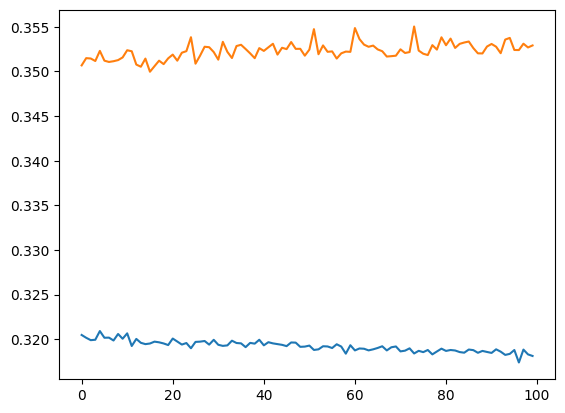

In [386]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

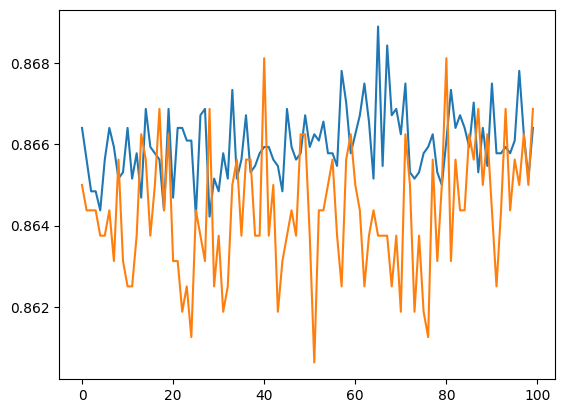

In [387]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])